# Dependences

In [1]:
using DelimitedFiles
using Images
using Plots

# Function

In [45]:
function countour_func(img, tickness)

    # Extracting the grayscale on the image
    img_channel = Gray.(.!(Gray.(img) .< Gray(img[1,1])*0.95))

    # Extracting the Contour on the image
    krnl_h = centered(Gray{Float32}[0 -1 -1 -1 0; 0 -1 -1 -1 0; 0 0 0 0 0; 0 1 1 1 0; 0 1 1 1 0]./12)
    grad_h = imfilter(img_channel, krnl_h')

    krnl_v = centered(Gray{Float32}[0 0 0 0 0; -1 -1 0 1 1;-1 -1 0 1 1;-1 -1 0 1 1;0 0 0 0 0 ]./12)
    grad_v = imfilter(img_channel, krnl_v')

    # Extracting the Contour on the image
    final_img = (grad_h.^2) .+ (grad_v.^2)
    final_img = Gray.(.!(Gray.(final_img) .> tickness))

    # Extracting the index of each point
    idx = CartesianIndices(size(final_img))[final_img .== 0]
    arr_idx = hcat(getindex.(idx,2),getindex.(idx,1))

    # Finding the center of center of mass
    center_of_mass = sum(arr_idx, dims=1)/size(arr_idx,1)

    # Putting the index in the center of mass
    center_idx = arr_idx - repeat(center_of_mass, size(arr_idx, 1))

    # Put the points on cilidrical coordinates
    r = sqrt.(sum(center_idx .^ 2, dims=2))
    θ = 180/pi .* (atan.(center_idx[:,2] ./ center_idx[:,1]) + pi*[center_idx[:,2] .< 0][1]) .+ 90
    center_idx_cil_coord = hcat(θ,r)

    return (center_idx_cil_coord)
end



countour_func (generic function with 1 method)

# Running

In [62]:
dir = hcat(collect(1:size(readdir("data"),1)),readdir("data"))

8×2 Matrix{Any}:
 1  "1.png"
 2  "2.png"
 3  "3.png"
 4  "4.png"
 5  "5.png"
 6  "6.png"
 7  "7.png"
 8  "8.png"

In [102]:
dir = readdir("data")
tickness = [0.24 0.24 0.24 0.24 0.24 0.24 0.24 0.24]
data = [countour_func(load("data/$(dir[d,1])"), tickness[d]) for d in 1:size(readdir("data"),1)]

8-element Vector{Matrix{Float64}}:
 [271.81470477439075 63.5902450740079; 270.91376699711054 63.56643617993817; … ; 268.0917865223828 60.47518394094704; 269.0391227529942 60.450148161415996]
 [272.09883330589633 60.11071423922133; 271.14580912115173 60.08240219671619; … ; 266.89036139360667 59.016509993274084; 267.8605742613007 58.97071764159616]
 [274.96897026109616 56.088905411539265; 273.94982571225 56.01114971462513; … ; 92.2251393298495 55.16348508192715; 93.26216701593819 55.21135452489417]
 [280.22828621944564 50.86527846939637; 279.11602137556315 50.69726025470799; … ; 96.68156844330929 51.291434053208; 97.78839603354125 51.41737887911967]
 [270.96280783736734 48.47875466721562; 89.78085865737339 48.472264653107906; … ; 95.14015678859313 46.715957287847964; 96.35917366286597 46.81614520479969]
 [276.1942801201618 46.41747613620315; 274.9644583697283 46.32024599941734; … ; 93.81574660900505 44.9531725761131; 95.0853992952346 45.03077640069462]
 [272.21869207859015 42.00413320967

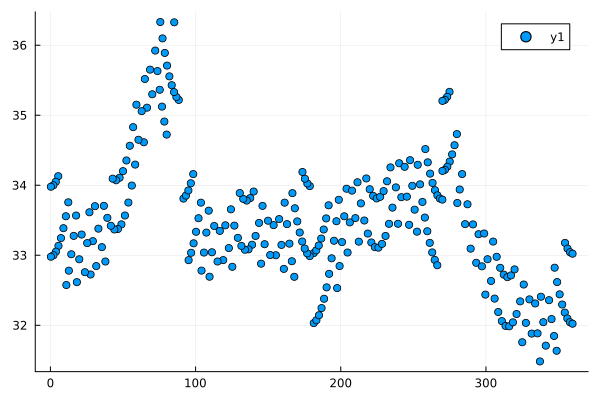

In [104]:
i = 8
plot(data[i][:,1], data[i][:,2], seriestype = :scatter)